# Deep Neural Networks: Batch Normalization Layer

by [yrevar](https://github.com/yrevar) 

It took few hours for me to derive perfect gradient equations for batch-norm layer, so I am thinking about to write about it soon. Alternatively, you can skim through this paper [Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift](http://arxiv.org/pdf/1502.03167v3.pdf). Also you can get some insights from the code below and a snapshot of my non-virtual notebook (I drew it quickly, and took few shortcuts in representing computation graph, but I hope you'll get the gist of it). 

```python
def batchnorm_backward(dout, cache):
  """
  Backward pass for batch normalization.
  
  For this implementation, you should write out a computation graph for
  batch normalization on paper and propagate gradients backward through
  intermediate nodes.
  
  Inputs:
  - dout: Upstream derivatives, of shape (N, D)
  - cache: Variable of intermediates from batchnorm_forward.
      x
  Returns a tuple of:
  - dx: Gradient with respect to inputs x, of shape (N, D)
  - dgamma: Gradient with respect to scale parameter gamma, of shape (D,)
  - dbeta: Gradient with respect to shift parameter beta, of shape (D,)
  """
  dx, dgamma, dbeta = None, None, None
  #############################################################################
  # TODO: Implement the backward pass for batch normalization. Store the      #
  # results in the dx, dgamma, and dbeta variables.                           #
  #############################################################################
  (xi, variance, eps, normalizer, gamma, mu) = cache 
  dyi = dout
  m = xi.shape[0]
  dxnorm = dout*gamma
  xinorm = (xi-mu)*normalizer
  dvar = -(dxnorm*(xi-mu)*((variance+eps)**(-3/2.0))/2).sum(axis=0)
  dmu = -(dxnorm*normalizer).sum(axis=0) + (dvar*(-2*(xi-mu)/m).sum(axis=0))
  dx = (dxnorm*normalizer) + (dmu/m) + dvar*2*(xi-mu)/m
  dgamma = (dyi*xinorm).sum(axis=0)
  dbeta = dyi.sum(axis=0)
  #############################################################################
  #                             END OF YOUR CODE                              #
  #############################################################################

  return dx, dgamma, dbeta
```

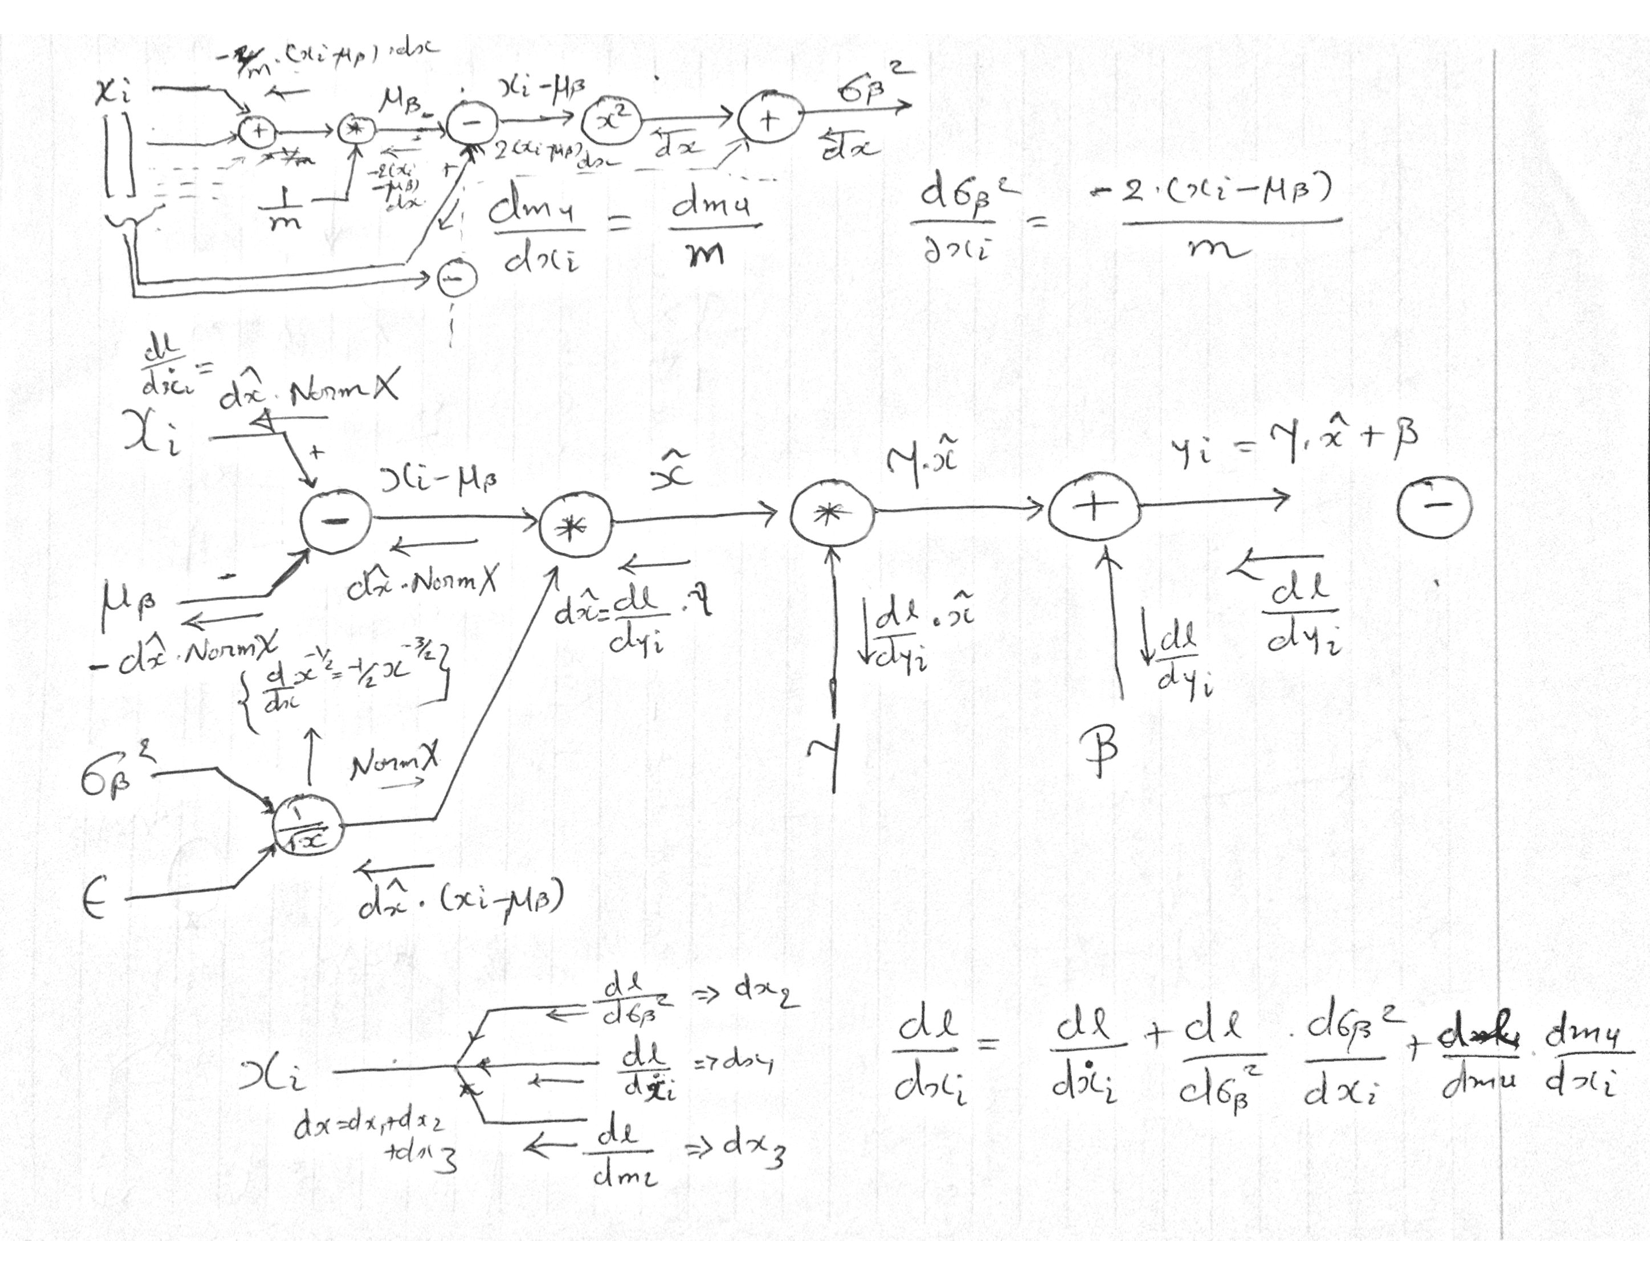

In [3]:
from IPython.display import Image
Image(filename='BatchNormBackProp.png')